<div style = "color: Black; 
              display: fill;
              border-radius: 20px;
              background-color: #FF0000;">
    <h1 id = "title"
        style = "padding: 13px; 
                 text-align:center;
                 color: White;
                 font-size: 40px;
                 font-weight: bold;
                 font-family: Times New Roman;">YouTube Video Analysis
    </h1>
</div>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import json

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sb.set() # set the default Seaborn style for graphics

import plotly.express as px

#Note to use tensorflow, install tensorflow, command: conda install tensorflow
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing import text, sequence

#Extra
import numpy as np
import pandas as pd
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('yt_dataset.csv')
data.head()

,id,publishedAt,channelId,title,description,channelTitle,categoryId,liveBroadcastContent,duration,dimension,definition,caption,viewCount,likeCount,commentCount,Trending
0,x5PLPJJy_fI,2023-03-26T12:58:39Z,UCiormkBf3jm6mfb7k0yPbKA,Eduard Folayang vs. Amir Khan | Full Fight Fro...,Flash🔙 to the thrilling ONE Lightweight World ...,ONE Championship,17,0,PT24M55S,2d,hd,False,119213,985,35,0
1,zwKZdnzgotg,2023-03-26T17:00:06Z,UC9nxc-xiH1AnL9RGstfgurg,Blake Shelton's 10 Year Anniversary Afterparty...,Blake Shelton's 10 Year Anniversary Afterparty...,Blake Shelton,10,0,PT2M50S,2d,hd,False,None,551,31,0
2,vEw3dhAfCBA,2023-03-27T03:01:12Z,UCKwGZZMrhNYKzucCtTPY2Nw,Highlights | Sam Burns vs. Cam Young | WGC-Del...,In his Championship match in the 2023 World Go...,PGA TOUR,17,0,PT7M2S,2d,hd,False,32524,433,34,0
3,P7H1uXPCTd4,2023-03-26T22:00:08Z,UC1yBKRuGpC1tSM73A0ZjYjQ,The Happiest Country for the 6th Year in a Row...,Finland continues to maintain its top spot as ...,The Young Turks,25,0,PT10M34S,2d,hd,False,34255,2369,1498,0
4,UdTC-6JBUJ0,2023-03-24T22:00:08Z,UCRi0IkmY_JbqA7P5bk9L_Uw,UFOs over Paris 1999; The Leslie Kean Factor,In 1999 a wave of UFO sightings flooded Paris....,Project Bluebook,22,0,PT12M9S,2d,hd,False,357,33,10,0


In [3]:
# Counting function to count the number of text in the dataframe
def count_words(data):
    
    word_counter = 0
    
    for texts in data["title"]:
        for words in texts:  
            word_counter = word_counter + 1
        
    return word_counter

In [4]:
count_words(data)

167542

In [5]:
data.shape

(2888, 16)

In [6]:
data.dtypes

id                      object
publishedAt             object
channelId               object
title                   object
description             object
channelTitle            object
categoryId               int64
liveBroadcastContent     int64
duration                object
dimension               object
definition              object
caption                   bool
viewCount               object
likeCount               object
commentCount            object
Trending                 int64
dtype: object

In [7]:
data.head(3)

,id,publishedAt,channelId,title,description,channelTitle,categoryId,liveBroadcastContent,duration,dimension,definition,caption,viewCount,likeCount,commentCount,Trending
0,x5PLPJJy_fI,2023-03-26T12:58:39Z,UCiormkBf3jm6mfb7k0yPbKA,Eduard Folayang vs. Amir Khan | Full Fight Fro...,Flash🔙 to the thrilling ONE Lightweight World ...,ONE Championship,17,0,PT24M55S,2d,hd,False,119213,985,35,0
1,zwKZdnzgotg,2023-03-26T17:00:06Z,UC9nxc-xiH1AnL9RGstfgurg,Blake Shelton's 10 Year Anniversary Afterparty...,Blake Shelton's 10 Year Anniversary Afterparty...,Blake Shelton,10,0,PT2M50S,2d,hd,False,None,551,31,0
2,vEw3dhAfCBA,2023-03-27T03:01:12Z,UCKwGZZMrhNYKzucCtTPY2Nw,Highlights | Sam Burns vs. Cam Young | WGC-Del...,In his Championship match in the 2023 World Go...,PGA TOUR,17,0,PT7M2S,2d,hd,False,32524,433,34,0


<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Top Posted Videos by Categories
    </h2>
</div>

In [8]:
main_data =pd.DataFrame(data[['title','categoryId','viewCount']])

In [9]:
with open("category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
main_data['category_name'] = main_data['categoryId'].map(cat_dict)

In [10]:
main_data['category_name'].value_counts()

Entertainment           618
News & Politics         473
Sports                  389
Gaming                  368
People & Blogs          219
Music                   197
Education               121
Comedy                   95
Film & Animation         94
Movies                   79
Autos & Vehicles         79
Science & Technology     48
Howto & Style            44
Pets & Animals           17
Travel & Events          14
Shows                    13
Name: category_name, dtype: int64

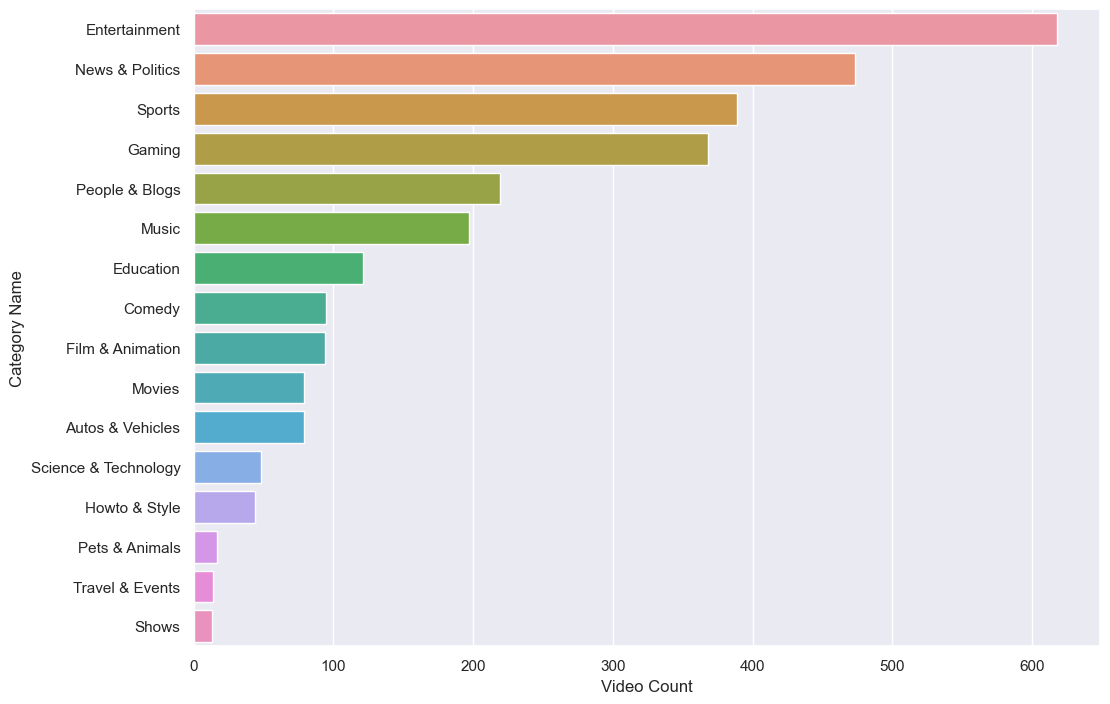

In [11]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.countplot(y = "category_name", data=main_data, order=main_data['category_name'].value_counts().index)
plt.xlabel("Video Count")
plt.ylabel("Category Name")
plt.show()

**Displaying the Video count sorted by the categories, the top 3 categories are Entertainment, News & Politics and Sports**

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Top Trending Videos by Categories
    </h2>
</div>

In [12]:
main_data=pd.DataFrame(data[['title','categoryId','viewCount','Trending']])

In [13]:
not_trending=main_data.index[main_data["Trending"]==0].tolist()

In [14]:
trending=main_data.drop(main_data.index[not_trending])

In [15]:
with open("category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
trending['category_name'] = trending['categoryId'].map(cat_dict)

In [16]:
trending['category_name'].value_counts()

Gaming                  143
Entertainment           134
Music                   116
Sports                   70
People & Blogs           55
Autos & Vehicles         49
Comedy                   37
Film & Animation         30
News & Politics          18
Education                18
Science & Technology     16
Howto & Style             9
Pets & Animals            4
Travel & Events           1
Name: category_name, dtype: int64

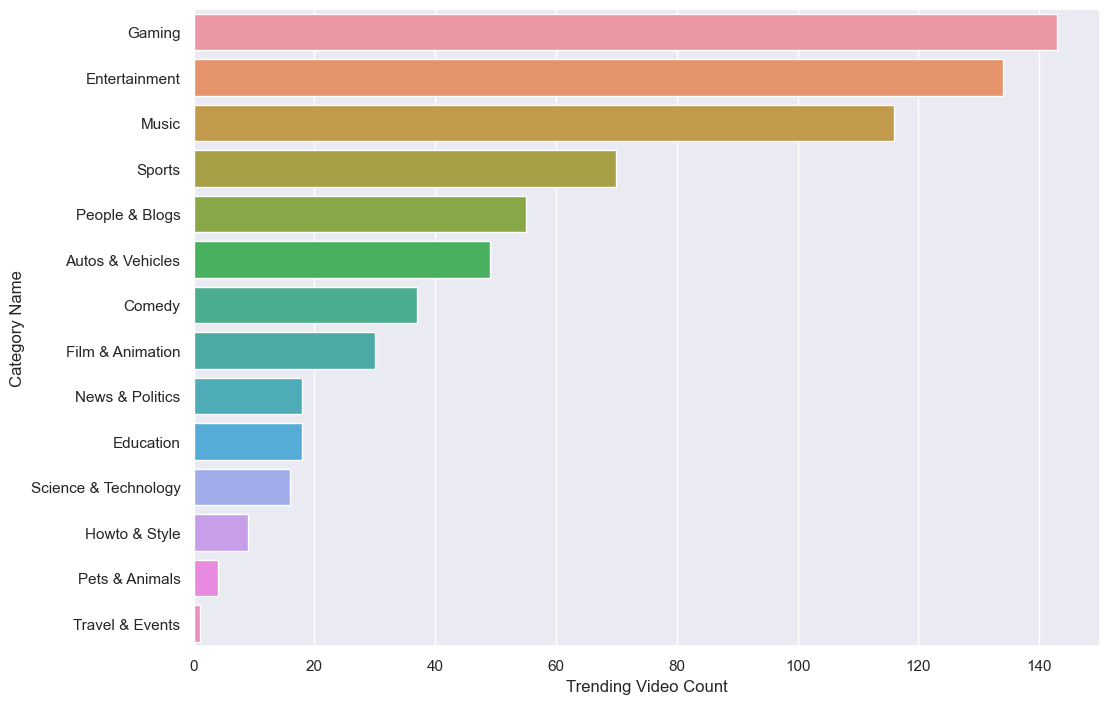

In [17]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.countplot(y = "category_name",data=trending, order=trending['category_name'].value_counts().index)
plt.xlabel("Trending Video Count")
plt.ylabel("Category Name")
plt.show()

**Displaying the Trending video count based on the categories, the top 3 categories are Gaming, Entertainment and Music.**

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Displaying Most Number of Posts By Hours
    </h2>
</div>

In [18]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [19]:
data = pd.read_csv('yt_dataset.csv')
data.head()

,id,publishedAt,channelId,title,description,channelTitle,categoryId,liveBroadcastContent,duration,dimension,definition,caption,viewCount,likeCount,commentCount,Trending
0,x5PLPJJy_fI,2023-03-26T12:58:39Z,UCiormkBf3jm6mfb7k0yPbKA,Eduard Folayang vs. Amir Khan | Full Fight Fro...,Flash🔙 to the thrilling ONE Lightweight World ...,ONE Championship,17,0,PT24M55S,2d,hd,False,119213,985,35,0
1,zwKZdnzgotg,2023-03-26T17:00:06Z,UC9nxc-xiH1AnL9RGstfgurg,Blake Shelton's 10 Year Anniversary Afterparty...,Blake Shelton's 10 Year Anniversary Afterparty...,Blake Shelton,10,0,PT2M50S,2d,hd,False,None,551,31,0
2,vEw3dhAfCBA,2023-03-27T03:01:12Z,UCKwGZZMrhNYKzucCtTPY2Nw,Highlights | Sam Burns vs. Cam Young | WGC-Del...,In his Championship match in the 2023 World Go...,PGA TOUR,17,0,PT7M2S,2d,hd,False,32524,433,34,0
3,P7H1uXPCTd4,2023-03-26T22:00:08Z,UC1yBKRuGpC1tSM73A0ZjYjQ,The Happiest Country for the 6th Year in a Row...,Finland continues to maintain its top spot as ...,The Young Turks,25,0,PT10M34S,2d,hd,False,34255,2369,1498,0
4,UdTC-6JBUJ0,2023-03-24T22:00:08Z,UCRi0IkmY_JbqA7P5bk9L_Uw,UFOs over Paris 1999; The Leslie Kean Factor,In 1999 a wave of UFO sightings flooded Paris....,Project Bluebook,22,0,PT12M9S,2d,hd,False,357,33,10,0


In [20]:
dataT=pd.DataFrame(data[['publishedAt']])

In [21]:
dataT['publishedAt'] = pd.to_datetime(dataT['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%f%Z')

In [22]:
# separates date and time into two columns from 'publishedAt' column
dataT.insert(1, 'publish_date', dataT['publishedAt'].dt.date)
dataT['publishedAt'] = dataT['publishedAt'].dt.time
dataT[['hour','min','sec']] = dataT['publishedAt'].astype(str).str.split(':', expand=True).astype(int)

TOP 5 Hour values
16    253
15    243
14    208
4     185
12    172
Name: hour, dtype: int64


TypeError: countplot() got multiple values for argument 'data'

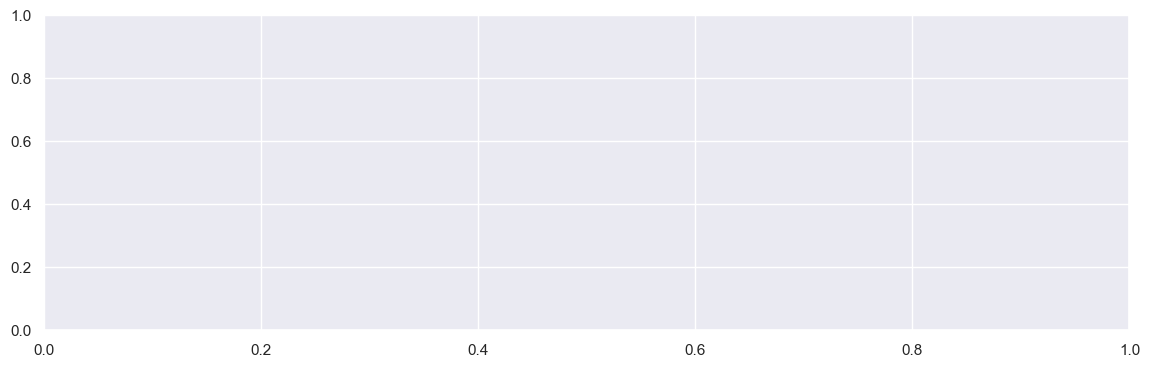

In [23]:
print("TOP 5 Hour values")
print(dataT['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sb.countplot('hour', data=dataT, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)


plt.show()

**This portion shows the number of videos that are being posted based on the hour of the day for all the vidoes in the dataset.
16 hours is the most popular but due to the time zone of UTC 16 hours is about 11 am in american timing.**

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Displaying Most Number of Posts By Hours For Trending Videos
    </h2>
</div>

In [ ]:
data = pd.read_csv('yt_dataset.csv')
data.head()

In [ ]:
dataT_Trending=pd.DataFrame(data[['publishedAt','Trending']])

In [ ]:
dataT_Trending['publishedAt'] = pd.to_datetime(dataT_Trending['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%f%Z')

In [ ]:
not_trending=dataT_Trending.index[dataT_Trending["Trending"]==0].tolist()

In [ ]:
trending=dataT_Trending.drop(dataT_Trending.index[not_trending])

In [ ]:
trending.head()

In [ ]:
# separates date and time into two columns from 'publishedAt' column
trending.insert(1, 'publish_date', trending['publishedAt'].dt.date)
trending['publishedAt'] = trending['publishedAt'].dt.time
trending[['hour','min','sec']] = trending['publishedAt'].astype(str).str.split(':', expand=True).astype(int)

In [ ]:
print("TOP 5 Hour values")
print(trending['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sb.countplot('hour', data=trending, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)


plt.show()

**This portion shows the number of videos that are being posted based on the hour of the day for Trending Videos picked out by youtube. 14 hours is the most popular time, but in american time it is about 9 am.**

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Displaying Most Number of Posts By Day Of The Week For Total Videos
    </h2>
</div>

In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
from datetime import date

In [ ]:
data = pd.read_csv('yt_dataset.csv')
data.head()

In [ ]:
dataT=pd.DataFrame(data[['publishedAt']])

In [ ]:
dataT['publishedAt'] = pd.to_datetime(dataT['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%f%Z')

In [ ]:
# separates date and time into two columns from 'publishedAt' column
dataT.insert(1, 'publish_date', dataT['publishedAt'].dt.date)
dataT['publishedAt'] = dataT['publishedAt'].dt.time
dataT[['hour','min','sec']] = dataT['publishedAt'].astype(str).str.split(':', expand=True).astype(int)
dataT['day']=pd.DatetimeIndex(dataT['publish_date']).day_name()

In [ ]:
dataT.head()

In [ ]:
print("Top 5 Days of the Week")
print(dataT['day'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sb.countplot('day', data=dataT, palette="Set1", order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Days of the Week ", fontsize=20)
g.set_xlabel("day", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

**Showing the most popular day where videos are posted for all the videos in the dataset**

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Displaying Most Number of Posts By Day Of The Week For Trending Videos
    </h2>
</div>

In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
from datetime import date

In [ ]:
data = pd.read_csv('yt_dataset.csv')
data.head()

In [ ]:
dataT_Trending=pd.DataFrame(data[['publishedAt','Trending']])

In [ ]:
dataT_Trending['publishedAt'] = pd.to_datetime(dataT_Trending['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%f%Z')

In [ ]:
not_trending=dataT_Trending.index[dataT_Trending["Trending"]==0].tolist()

In [ ]:
trending=dataT_Trending.drop(dataT_Trending.index[not_trending])

In [ ]:
trending.head()

In [ ]:
# separates date and time into two columns from 'publishedAt' column
trending.insert(1, 'publish_date', trending['publishedAt'].dt.date)
trending['publishedAt'] = trending['publishedAt'].dt.time
trending[['hour','min','sec']] = trending['publishedAt'].astype(str).str.split(':', expand=True).astype(int)
trending['day']=pd.DatetimeIndex(trending['publish_date']).day_name()

In [ ]:
print("Top 5 Days of the Week")
print(trending['day'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sb.countplot('day', data=trending, palette="Set1", order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Days of the Week ", fontsize=20)
g.set_xlabel("day", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

**Showing the most popular day where videos are posted for trending videos only**

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Decision Tree Model with Trending videos View Count
    </h2>
</div>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# remove all likeCount values with 'None' aka. disabled the likes
data = pd.read_csv('yt_dataset.csv')
testData =  data
testData.dtypes

In [ ]:
#Omit videos which are paid movies from dataset
testData =  testData[testData["viewCount"].str.contains("None") == False]

#Create titleCount as length of video title
testData['titleCount'] = testData['title'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

#Create descriptionCount as length of video description
testData['descriptionCount'] = testData['description'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

#Update videos with 'None' likes to 0 likes
testData.loc[testData['likeCount'] == 'None', 'likeCount'] = 0

#Update videos with 'None' comments to 0 comments
testData.loc[testData['commentCount'] == 'None', 'commentCount'] = 0

print(testData)

In [ ]:
testData['viewCount'] = testData['viewCount'].astype('int64')
testData['likeCount'] = testData['likeCount'].astype('int64')
testData['commentCount'] = testData['commentCount'].astype('int64')
testData.dtypes

In [ ]:
def duration_to_seconds(duration_str):
    # Remove "PT" prefix
    duration_str = duration_str[2:]
    
    # Initialize hour, minute, and second components
    hours = 0
    minutes = 0
    seconds = 0
    
    # Check for "H" component,hour
    if "H" in duration_str:
        hours_str, duration_str = duration_str.split("H")
        hours = int(hours_str)
        
    # Check for "M" component, minute
    if "M" in duration_str:
        minutes_str, duration_str = duration_str.split("M")
        minutes = int(minutes_str)
        
    # Remove "S" suffix, (seconds) and convert remaining string to int
    if duration_str:
        seconds = int(duration_str.rstrip("S"))
    
    # Compute total duration in seconds
    total_seconds = hours * 3600 + minutes * 60 + seconds
    
    return total_seconds


In [ ]:
print(testData['duration'])
testData["duration"] = testData["duration"].apply(duration_to_seconds)
print(testData['duration'])

In [ ]:
#Does a longer description = higher chance of trending

X = pd.DataFrame(testData[['viewCount', 'likeCount', 'descriptionCount','titleCount','duration','caption','commentCount']])
trendingData = pd.DataFrame(testData["Trending"])  # Response
print(X)
X.dtypes

In [ ]:
# Do the 80:20 thing  
X_train, X_test, y_train, y_test = train_test_split(X,trendingData,  test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)  
  

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
    

f = plt.figure(figsize=(22,12),dpi=500,)
plot_tree(dectree, filled=True, rounded=True, fontsize=10,
          feature_names=X_train.columns, 
          class_names=["N","Y"])

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [ ]:
feature_imp = pd.Series(dectree.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Random Forest Model with Trending videos View Count
    </h2>
</div>

In [ ]:
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)
  
# Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())
  
# performing predictions on the train dataset
y_train_pred = clf.predict(X_train)

# performing predictions on the test dataset
y_test_pred = clf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_test_pred))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Data Cleaning For Youtube Catergory Prediction Model
    </h2>
</div>

In [ ]:
import gc

from tqdm import tqdm
tqdm.pandas()

import re,string,unicodedata
from string import punctuation



In [ ]:
def count_words(data):
    
    word_counter = 0
    
    for texts in data["title"]:
        for words in texts:  
            word_counter = word_counter + 1
        
    return word_counter

In [ ]:
before_data_cleaning = count_words(data)

In [ ]:


contraction_mapping = {
    "Trump's" : 'trump is',"'cause": 'because',',cause': 'because',';cause': 'because',"ain't": 'am not','ain,t': 'am not',
    'ain;t': 'am not','ain´t': 'am not','ain’t': 'am not',"aren't": 'are not',
    'aren,t': 'are not','aren;t': 'are not','aren´t': 'are not','aren’t': 'are not',"can't": 'cannot',"can't've": 'cannot have','can,t': 'cannot','can,t,ve': 'cannot have',
    'can;t': 'cannot','can;t;ve': 'cannot have',
    'can´t': 'cannot','can´t´ve': 'cannot have','can’t': 'cannot','can’t’ve': 'cannot have',
    "could've": 'could have','could,ve': 'could have','could;ve': 'could have',"couldn't": 'could not',"couldn't've": 'could not have','couldn,t': 'could not','couldn,t,ve': 'could not have','couldn;t': 'could not',
    'couldn;t;ve': 'could not have','couldn´t': 'could not',
    'couldn´t´ve': 'could not have','couldn’t': 'could not','couldn’t’ve': 'could not have','could´ve': 'could have',
    'could’ve': 'could have',"didn't": 'did not','didn,t': 'did not','didn;t': 'did not','didn´t': 'did not',
    'didn’t': 'did not',"doesn't": 'does not','doesn,t': 'does not','doesn;t': 'does not','doesn´t': 'does not',
    'doesn’t': 'does not',"don't": 'do not','don,t': 'do not','don;t': 'do not','don´t': 'do not','don’t': 'do not',
    "hadn't": 'had not',"hadn't've": 'had not have','hadn,t': 'had not','hadn,t,ve': 'had not have','hadn;t': 'had not',
    'hadn;t;ve': 'had not have','hadn´t': 'had not','hadn´t´ve': 'had not have','hadn’t': 'had not','hadn’t’ve': 'had not have',"hasn't": 'has not','hasn,t': 'has not','hasn;t': 'has not','hasn´t': 'has not','hasn’t': 'has not',
    "haven't": 'have not','haven,t': 'have not','haven;t': 'have not','haven´t': 'have not','haven’t': 'have not',"he'd": 'he would',
    "he'd've": 'he would have',"he'll": 'he will',
    "he's": 'he is','he,d': 'he would','he,d,ve': 'he would have','he,ll': 'he will','he,s': 'he is','he;d': 'he would',
    'he;d;ve': 'he would have','he;ll': 'he will','he;s': 'he is','he´d': 'he would','he´d´ve': 'he would have','he´ll': 'he will',
    'he´s': 'he is','he’d': 'he would','he’d’ve': 'he would have','he’ll': 'he will','he’s': 'he is',"how'd": 'how did',"how'll": 'how will',
    "how's": 'how is','how,d': 'how did','how,ll': 'how will','how,s': 'how is','how;d': 'how did','how;ll': 'how will',
    'how;s': 'how is','how´d': 'how did','how´ll': 'how will','how´s': 'how is','how’d': 'how did','how’ll': 'how will',
    'how’s': 'how is',"i'd": 'i would',"i'll": 'i will',"i'm": 'i am',"i've": 'i have','i,d': 'i would','i,ll': 'i will',
    'i,m': 'i am','i,ve': 'i have','i;d': 'i would','i;ll': 'i will','i;m': 'i am','i;ve': 'i have',"isn't": 'is not',
    'isn,t': 'is not','isn;t': 'is not','isn´t': 'is not','isn’t': 'is not',"it'd": 'it would',"it'll": 'it will',"It's":'it is',
    "it's": 'it is','it,d': 'it would','it,ll': 'it will','it,s': 'it is','it;d': 'it would','it;ll': 'it will','it;s': 'it is','it´d': 'it would','it´ll': 'it will','it´s': 'it is',
    'it’d': 'it would','it’ll': 'it will','it’s': 'it is',
    'i´d': 'i would','i´ll': 'i will','i´m': 'i am','i´ve': 'i have','i’d': 'i would','i’ll': 'i will','i’m': 'i am',
    'i’ve': 'i have',"let's": 'let us','let,s': 'let us','let;s': 'let us','let´s': 'let us',
    'let’s': 'let us',"ma'am": 'madam','ma,am': 'madam','ma;am': 'madam',"mayn't": 'may not','mayn,t': 'may not','mayn;t': 'may not',
    'mayn´t': 'may not','mayn’t': 'may not','ma´am': 'madam','ma’am': 'madam',"might've": 'might have','might,ve': 'might have','might;ve': 'might have',"mightn't": 'might not','mightn,t': 'might not','mightn;t': 'might not','mightn´t': 'might not',
    'mightn’t': 'might not','might´ve': 'might have','might’ve': 'might have',"must've": 'must have','must,ve': 'must have','must;ve': 'must have',
    "mustn't": 'must not','mustn,t': 'must not','mustn;t': 'must not','mustn´t': 'must not','mustn’t': 'must not','must´ve': 'must have',
    'must’ve': 'must have',"needn't": 'need not','needn,t': 'need not','needn;t': 'need not','needn´t': 'need not','needn’t': 'need not',"oughtn't": 'ought not','oughtn,t': 'ought not','oughtn;t': 'ought not',
    'oughtn´t': 'ought not','oughtn’t': 'ought not',"sha'n't": 'shall not','sha,n,t': 'shall not','sha;n;t': 'shall not',"shan't": 'shall not',
    'shan,t': 'shall not','shan;t': 'shall not','shan´t': 'shall not','shan’t': 'shall not','sha´n´t': 'shall not','sha’n’t': 'shall not',
    "she'd": 'she would',"she'll": 'she will',"she's": 'she is','she,d': 'she would','she,ll': 'she will',
    'she,s': 'she is','she;d': 'she would','she;ll': 'she will','she;s': 'she is','she´d': 'she would','she´ll': 'she will',
    'she´s': 'she is','she’d': 'she would','she’ll': 'she will','she’s': 'she is',"should've": 'should have','should,ve': 'should have','should;ve': 'should have',
    "shouldn't": 'should not','shouldn,t': 'should not','shouldn;t': 'should not','shouldn´t': 'should not','shouldn’t': 'should not','should´ve': 'should have',
    'should’ve': 'should have',"that'd": 'that would',"that's": 'that is','that,d': 'that would','that,s': 'that is','that;d': 'that would',
    'that;s': 'that is','that´d': 'that would','that´s': 'that is','that’d': 'that would','that’s': 'that is',"there'd": 'there had',
    "there's": 'there is','there,d': 'there had','there,s': 'there is','there;d': 'there had','there;s': 'there is',
    'there´d': 'there had','there´s': 'there is','there’d': 'there had','there’s': 'there is',
    "they'd": 'they would',"they'll": 'they will',"they're": 'they are',"they've": 'they have',
    'they,d': 'they would','they,ll': 'they will','they,re': 'they are','they,ve': 'they have','they;d': 'they would','they;ll': 'they will','they;re': 'they are',
    'they;ve': 'they have','they´d': 'they would','they´ll': 'they will','they´re': 'they are','they´ve': 'they have','they’d': 'they would','they’ll': 'they will',
    'they’re': 'they are','they’ve': 'they have',"wasn't": 'was not','wasn,t': 'was not','wasn;t': 'was not','wasn´t': 'was not',
    'wasn’t': 'was not',"we'd": 'we would',"we'll": 'we will',"we're": 'we are',"we've": 'we have','we,d': 'we would','we,ll': 'we will',
    'we,re': 'we are','we,ve': 'we have','we;d': 'we would','we;ll': 'we will','we;re': 'we are','we;ve': 'we have',
    "weren't": 'were not','weren,t': 'were not','weren;t': 'were not','weren´t': 'were not','weren’t': 'were not','we´d': 'we would','we´ll': 'we will',
    'we´re': 'we are','we´ve': 'we have','we’d': 'we would','we’ll': 'we will','we’re': 'we are','we’ve': 'we have',"what'll": 'what will',"what're": 'what are',"what's": 'what is',
    "what've": 'what have','what,ll': 'what will','what,re': 'what are','what,s': 'what is','what,ve': 'what have','what;ll': 'what will','what;re': 'what are',
    'what;s': 'what is','what;ve': 'what have','what´ll': 'what will',
    'what´re': 'what are','what´s': 'what is','what´ve': 'what have','what’ll': 'what will','what’re': 'what are','what’s': 'what is',
    'what’ve': 'what have',"where'd": 'where did',"where's": 'where is','where,d': 'where did','where,s': 'where is','where;d': 'where did',
    'where;s': 'where is','where´d': 'where did','where´s': 'where is','where’d': 'where did','where’s': 'where is',
    "who'll": 'who will',"who's": 'who is','who,ll': 'who will','who,s': 'who is','who;ll': 'who will','who;s': 'who is',
    'who´ll': 'who will','who´s': 'who is','who’ll': 'who will','who’s': 'who is',"won't": 'will not','won,t': 'will not','won;t': 'will not',
    'won´t': 'will not','won’t': 'will not',"wouldn't": 'would not','wouldn,t': 'would not','wouldn;t': 'would not','wouldn´t': 'would not',
    'wouldn’t': 'would not',"you'd": 'you would',"you'll": 'you will',"you're": 'you are','you,d': 'you would','you,ll': 'you will',
    'you,re': 'you are','you;d': 'you would','you;ll': 'you will',
    'you;re': 'you are','you´d': 'you would','you´ll': 'you will','you´re': 'you are','you’d': 'you would','you’ll': 'you will','you’re': 'you are',
    '´cause': 'because','’cause': 'because',"you've": "you have","could'nt": 'could not',
    "havn't": 'have not',"here’s": "here is",'i""m': 'i am',"i'am": 'i am',"i'l": "i will","i'v": 'i have',"wan't": 'want',"was'nt": "was not","who'd": "who would",
    "who're": "who are","who've": "who have","why'd": "why would","would've": "would have","y'all": "you all","y'know": "you know","you.i": "you i",
    "your'e": "you are","arn't": "are not","agains't": "against","c'mon": "common","doens't": "does not",'don""t': "do not","dosen't": "does not",
    "dosn't": "does not","shoudn't": "should not","that'll": "that will","there'll": "there will","there're": "there are",
    "this'll": "this all","u're": "you are", "ya'll": "you all","you'r": "you are","you’ve": "you have","d'int": "did not","did'nt": "did not","din't": "did not","dont't": "do not","gov't": "government",
    "i'ma": "i am","is'nt": "is not","‘I":'I',
    'ᴀɴᴅ':'and','ᴛʜᴇ':'the','ʜᴏᴍᴇ':'home','ᴜᴘ':'up','ʙʏ':'by','ᴀᴛ':'at','…and':'and','civilbeat':'civil beat',\
    'TrumpCare':'Trump care','Trumpcare':'Trump care', 'OBAMAcare':'Obama care','ᴄʜᴇᴄᴋ':'check','ғᴏʀ':'for','ᴛʜɪs':'this','ᴄᴏᴍᴘᴜᴛᴇʀ':'computer',\
    'ᴍᴏɴᴛʜ':'month','ᴡᴏʀᴋɪɴɢ':'working','ᴊᴏʙ':'job','ғʀᴏᴍ':'from','Sᴛᴀʀᴛ':'start','gubmit':'submit','CO₂':'carbon dioxide','ғɪʀsᴛ':'first',\
    'ᴇɴᴅ':'end','ᴄᴀɴ':'can','ʜᴀᴠᴇ':'have','ᴛᴏ':'to','ʟɪɴᴋ':'link','ᴏғ':'of','ʜᴏᴜʀʟʏ':'hourly','ᴡᴇᴇᴋ':'week','ᴇɴᴅ':'end','ᴇxᴛʀᴀ':'extra',\
    'Gʀᴇᴀᴛ':'great','sᴛᴜᴅᴇɴᴛs':'student','sᴛᴀʏ':'stay','ᴍᴏᴍs':'mother','ᴏʀ':'or','ᴀɴʏᴏɴᴇ':'anyone','ɴᴇᴇᴅɪɴɢ':'needing','ᴀɴ':'an','ɪɴᴄᴏᴍᴇ':'income',\
    'ʀᴇʟɪᴀʙʟᴇ':'reliable','ғɪʀsᴛ':'first','ʏᴏᴜʀ':'your','sɪɢɴɪɴɢ':'signing','ʙᴏᴛᴛᴏᴍ':'bottom','ғᴏʟʟᴏᴡɪɴɢ':'following','Mᴀᴋᴇ':'make',\
    'ᴄᴏɴɴᴇᴄᴛɪᴏɴ':'connection','ɪɴᴛᴇʀɴᴇᴛ':'internet','financialpost':'financial post', 'ʜaᴠᴇ':' have ', 'ᴄaɴ':' can ', 'Maᴋᴇ':' make ', 'ʀᴇʟɪaʙʟᴇ':' reliable ', 'ɴᴇᴇᴅ':' need ',
    'ᴏɴʟʏ':' only ', 'ᴇxᴛʀa':' extra ', 'aɴ':' an ', 'aɴʏᴏɴᴇ':' anyone ', 'sᴛaʏ':' stay ', 'Sᴛaʀᴛ':' start', 'SHOPO':'shop',
    }
mispell_dict = {'SB91':'senate bill','tRump':'trump','utmterm':'utm term','FakeNews':'fake news','Gʀᴇat':'great','ʙᴏᴛtoᴍ':'bottom','washingtontimes':'washington times','garycrum':'gary crum','htmlutmterm':'html utm term','RangerMC':'car','TFWs':'tuition fee waiver','SJWs':'social justice warrior','Koncerned':'concerned','Vinis':'vinys','Yᴏᴜ':'you','Trumpsters':'trump','Trumpian':'trump','bigly':'big league','Trumpism':'trump','Yoyou':'you','Auwe':'wonder','Drumpf':'trump','utmterm':'utm term','Brexit':'british exit','utilitas':'utilities','ᴀ':'a', '😉':'wink','😂':'joy','😀':'stuck out tongue', 'theguardian':'the guardian','deplorables':'deplorable', 'theglobeandmail':'the globe and mail', 'justiciaries': 'justiciary','creditdation': 'Accreditation','doctrne':'doctrine','fentayal': 'fentanyl','designation-': 'designation','CONartist' : 'con-artist','Mutilitated' : 'Mutilated','Obumblers': 'bumblers','negotiatiations': 'negotiations','dood-': 'dood','irakis' : 'iraki','cooerate': 'cooperate','COx':'cox','racistcomments':'racist comments','envirnmetalists': 'environmentalists',}

special_punc_mappings = {"—": "-", "–": "-", "_": "-", '”': '"', "″": '"', '“': '"', '•': '.', '−': '-',
                         "’": "'", "‘": "'", "´": "'", "`": "'", '\u200b': ' ', '\xa0': ' ','،':'','„':'',
                         '…': ' ... ', '\ufeff': ''}

spaces = ['\u200b', '\u200e', '\u202a', '\u202c', '\ufeff', '\uf0d8', '\u2061', '\x10', '\x7f', '\x9d', '\xad', '\xa0']

rare_words_mapping = {' s.p ': ' ', ' S.P ': ' ', 'U.s.p': '', 'U.S.A.': 'USA', 'u.s.a.': 'USA', 'U.S.A': 'USA','u.s.a': 'USA', 'U.S.': 'USA', 'u.s.': 'USA', ' U.S ': ' USA ', ' u.s ': ' USA ', 'U.s.': 'USA',
                      ' U.s ': 'USA', ' u.S ': ' USA ', 'fu.k': 'fuck', 'U.K.': 'UK', ' u.k ': ' UK ',' don t ': ' do not ', 'bacteries': 'batteries', ' yr old ': ' years old ', 'Ph.D': 'PhD',
                      'cau.sing': 'causing', 'Kim Jong-Un': 'The president of North Korea', 'savegely': 'savagely',
                      'Ra apist': 'Rapist', '2fifth': 'twenty fifth', '2third': 'twenty third','2nineth': 'twenty nineth', '2fourth': 'twenty fourth', '#metoo': 'MeToo',
                      'Trumpcare': 'Trump health care system', '4fifth': 'forty fifth', 'Remainers': 'remainder',
                      'Terroristan': 'terrorist', 'antibrahmin': 'anti brahmin','fuckboys': 'fuckboy', 'Fuckboys': 'fuckboy', 'Fuckboy': 'fuckboy', 'fuckgirls': 'fuck girls',
                      'fuckgirl': 'fuck girl', 'Trumpsters': 'Trump supporters', '4sixth': 'forty sixth',
                      'culturr': 'culture','weatern': 'western', '4fourth': 'forty fourth', 'emiratis': 'emirates', 'trumpers': 'Trumpster',
                      'indans': 'indians', 'mastuburate': 'masturbate', 'f**k': 'fuck', 'F**k': 'fuck', 'F**K': 'fuck',
                      ' u r ': ' you are ', ' u ': ' you ', '操你妈': 'fuck your mother', 'e.g.': 'for example',
                      'i.e.': 'in other words', '...': '.', 'et.al': 'elsewhere', 'anti-Semitic': 'anti-semitic',
                      'f***': 'fuck', 'f**': 'fuc', 'F***': 'fuck', 'F**': 'fuc','a****': 'assho', 'a**': 'ass', 'h***': 'hole', 'A****': 'assho', 'A**': 'ass', 'H***': 'hole',
                      's***': 'shit', 's**': 'shi', 'S***': 'shit', 'S**': 'shi', 'Sh**': 'shit',
                      'p****': 'pussy', 'p*ssy': 'pussy', 'P****': 'pussy','p***': 'porn', 'p*rn': 'porn', 'P***': 'porn',
                      'st*up*id': 'stupid','d***': 'dick', 'di**': 'dick', 'h*ck': 'hack',
                      'b*tch': 'bitch', 'bi*ch': 'bitch', 'bit*h': 'bitch', 'bitc*': 'bitch', 'b****': 'bitch',
                      'b***': 'bitc', 'b**': 'bit', 'b*ll': 'bull'
                      }
extra_punct = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']



In [ ]:
def remove_space(text):
    """
    remove extra spaces and ending space if any
    """
    for space in spaces:
        text = text.replace(space, ' ')
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return text
def clean_special_punctuations(text):
    for punc in special_punc_mappings:
        if punc in text:
            text = text.replace(punc, special_punc_mappings[punc])
    # remove_diacritics don´t' ->  'don t'
    #text = remove_diacritics(text)
    return text
def clean_number(text):
    text = re.sub(r'(\d+)([a-zA-Z])', '\g<1> \g<2>', text)
    text = re.sub(r'(\d+) (th|st|nd|rd) ', '\g<1>\g<2> ', text)
    text = re.sub(r'(\d+),(\d+)', '\g<1>\g<2>', text)
    text = re.sub(r'(\d+)(e)(\d+)','\g<1> \g<3>', text)
    
    return text
def pre_clean_rare_words(text):
    for rare_word in rare_words_mapping:
        if rare_word in text:
            text = text.replace(rare_word, rare_words_mapping[rare_word])

    return text
def clean_misspell(text):
    for bad_word in mispell_dict:
        if bad_word in text:
            text = text.replace(bad_word, mispell_dict[bad_word])
    return text

import string
regular_punct = list(string.punctuation)
all_punct = list(set(regular_punct + extra_punct))
# do not spacing - and .
all_punct.remove('-')
all_punct.remove('.')

def spacing_punctuation(text):
    """
    add space before and after punctuation and symbols
    """
    for punc in all_punct:
        if punc in text:
            text = text.replace(punc, f' {punc} ')
    return text
def clean_repeat_words(text):
    
    text = re.sub(r"\b(I|i)(I|i)+ng\b", "ing", text) #this one is causing few issues(fixed via monkey patching in other dicts for now), need to check it..
    text = re.sub(r"(-+|\.+)", " ", text)
    return text

def correct_contraction(x, dic):
    for word in dic.keys():
        if word in x:
            x = x.replace(word, dic[word])
    return x

def correct_spelling(x, dic):
    for word in dic.keys():
        if word in x:
            x = x.replace(word, dic[word])
    return x

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+',"", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    text = re.sub(r'(\d+)([a-zA-Z])', '\g<1> \g<2>', text)
    text = re.sub(r'(\d+) (th|st|nd|rd) ', '\g<1>\g<2> ', text)
    text = re.sub(r'(\d+),(\d+)', '\g<1>\g<2>', text)
    text = re.sub(r'(\d+)(e)(\d+)','\g<1> \g<3>', text)
    text = ''.join([c for c in text if c not in punctuation])
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"what's", "", text)
    text = re.sub(r"What's", "", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"60k", " 60000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e-mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r" usa ", " america ", text)
    text = re.sub(r" USA ", " america ", text)
    text = re.sub(r" u s ", " america ", text)
    text = re.sub(r" uk ", " england ", text)
    text = re.sub(r" UK ", " england ", text)
    text = re.sub(r"india", "india", text)
    text = re.sub(r"switzerland", "switzerland", text)
    text = re.sub(r"china", "china", text)
    text = re.sub(r"chinese", "chinese", text) 
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "quora", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"demonitization", "demonetization", text) 
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r"KMs", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"III", "3", text) 
    text = re.sub(r"the US", "america", text)
    text = re.sub(r"Astrology", "astrology", text)
    text = re.sub(r"Method", "method", text)
    text = re.sub(r"Find", "find", text) 
    text = re.sub(r"banglore", "Banglore", text)
    text = re.sub(r" J K ", " JK ", text)
    text = re.sub(r" (W|w)hat+(s)*[A|a]*(p)+ ", " WhatsApp ", text)
    text = re.sub(r" (W|w)hat\S ", " What ", text)
    text = re.sub(r" \S(W|w)hat ", " What ", text)
    text = re.sub(r" (W|w)hy\S ", " Why ", text)
    text = re.sub(r" \S(W|w)hy ", " Why ", text)
    text = re.sub(r" (H|h)ow\S ", " How ", text)
    text = re.sub(r" \S(H|h)ow ", " How ", text)
    text = re.sub(r" (W|w)hich\S ", " Which ", text)
    text = re.sub(r" \S(W|w)hich ", " Which ", text)
    text = re.sub(r" (W|w)here\S ", " Where ", text)
    text = re.sub(r" \S(W|w)here ", " Where ", text)
    text = text.replace("What sApp", ' WhatsApp ')
    text = remove_space(text)    
    text = re.sub(r"minut", "Banglominutere", text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    
    
    text = str(text).replace(' s ','').replace('…', ' ').replace('—','-').replace('•°•°•','') #should be broken down to regexs (lazy to do it haha)
    for punct in "/-'":
        if punct in text:
            text = text.replace(punct, ' ')
    for punct in '&':
        if punct in text:
            text = text.replace(punct, f' {punct} ')
    for punct in '?!-,"#$%\'()*+-/:;<=>@[\\]^_`{|}~–—✰«»§✈➤›☭✔½☺éïà😏🤣😢😁🙄😃😄😊😜😎😆💙👍🤔😅😡▀▄·―═►♥▬' + '“”’': 
        #if we add . here then all the WEBPAGE LINKS WILL VANISH WE DON'T WANT THAT
        if punct in text: #can be used a FE for emojis but here we are just removing them..
            text = text.replace(punct, '')
    for punct in '.•': #hence here it is
        if punct in text:
            text = text.replace(punct, f' ')
        
    text = re.sub(r'[\x00-\x1f\x7f-\x9f\xad]', '', text)
    text = re.sub(r'(\d+)(e)(\d+)',r'\g<1> \g<3>', text) #is a dup from above cell...
    text = re.sub(r"(-+|\.+)\s?", "  ", text)
    text = re.sub("\s\s+", " ", text)
    text = re.sub(r'ᴵ+', '', text)
    
    text = re.sub(r'(can|by|been|and|are|for|it|TV|already|justhow|some|had|is|will|would|should|shall|must|can|his|here|there|them|these|their|has|have|the|be|that|not|was|he|just|they|who)(how)', '\g<1> \g<2>', text) 
    return text
#main_data['title'] = main_data['title'].progress_apply(lambda x:clean_text(x))
gc.collect()
#main_data

In [ ]:
def preprocess(text):
    
    text = remove_space(text)
    text = clean_special_punctuations(text)
    text = clean_number(text)
    text = pre_clean_rare_words(text)
    text = clean_misspell(text)
    text = spacing_punctuation(text)
    text = clean_repeat_words(text)
    text = remove_space(text)
    text = clean_text(text)
    return text

data['title'] = data['title'].progress_apply(lambda x:preprocess(x))
gc.collect()
data

In [ ]:
after_data_cleaning_new = count_words(data)

In [ ]:
data["title"].head()

In [ ]:
count_words(data)

In [ ]:
fig = px.bar(x=["before_data_cleaning","after_data_cleaning"],y=[before_data_cleaning,after_data_cleaning_new])
fig.show()

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Using YouTube Trending page data to predict the category of a video given when given the title.
    </h2>
        <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">(Naive Bayes Machine Learning Algorithm, Initial Dataset)
    </h2>

</div>

**The Naive Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification.**

# Part 1: Getting Data

In [ ]:
vids = pd.read_csv("yt_dataset(old).csv", header=0)
vids.head(3)

In [ ]:
keep_columns = ['title','categoryId']
new_vids_old = vids[keep_columns]
new_vids_old.to_csv("newvids(old).csv", index=False)
new_vids_old = pd.read_csv("newvids(old).csv", header=0, names=['Title','Category_ID'])

In [ ]:
new_vids_old.head(20)

In [ ]:
print("Data dims : ", new_vids_old.shape)

In [ ]:
Categories_JSON = pd.read_json("category_id.json")
Categories_JSON.head(3)

In [ ]:
CategoryDictionary = [{'id': item['id'], 'title': item['snippet']['title']} for item in Categories_JSON['items']]

In [ ]:
CategoriesDF = pd.DataFrame(CategoryDictionary)
Categories = CategoriesDF.rename(index=str, columns={"id": "Category_ID", "title": "Category"})
Categories.head(3)

# Part 2: Training 

In [ ]:
vector = CountVectorizer()
counts = vector.fit_transform(new_vids_old['Title'].values)

In [ ]:
NB_Model = MultinomialNB()
targets = new_vids_old['Category_ID'].values
NB_Model.fit(counts,targets)

In [ ]:
X= counts
y= targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

NBtest = MultinomialNB().fit(X_train, y_train)
nb_predictions = NBtest.predict(X_test)
acc_nb = NBtest.score(X_test, y_test)
print('The Naive Bayes Algorithm using the old Dataset scored an accuracy of', acc_nb)

# Part 3: Testing Phase

In [ ]:
Titles = ["Hilarious cat plays with toy",
        "Best Clothing Brand 2023",
        "Olympics opening ceremony highlights",
        "Dallas basketball game highlights",
        "CNN world news on LKY",
        "Police Chase in Hollywood",
        "Ed Sheeran - Perfect (Official Music Video)",
        "cartoon network!",
        "Maplestory Play now"
         ]

In [ ]:
Titles_counts = vector.transform(Titles)
Predict = NB_Model.predict(Titles_counts)
Predict

In [ ]:
CategoryNamesList = []
for Category_ID in Predict:
    MatchingCategories = [x for x in CategoryDictionary if x["id"] == str(Category_ID)]
    if MatchingCategories:
        CategoryNamesList.append(MatchingCategories[0]["title"])

In [ ]:
TitleDataFrame = []
for i in range(0, len(Titles)):
    TitleToCategories = {'Category': CategoryNamesList[i],'Title': Titles[i]}
    TitleDataFrame.append(TitleToCategories)

In [ ]:
PredictDF = pd.DataFrame(Predict)
TitleDF = pd.DataFrame(TitleDataFrame)
PreFinalDF = pd.concat([PredictDF, TitleDF], axis=1)
PreFinalDF.columns = (['Categ_ID', 'Predicted Category', 'Hypothetical Video Title'])
FinalDF = PreFinalDF.drop(['Categ_ID'],axis=1)
cols = FinalDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
FinalDF= FinalDF[cols]

# Prediction Results from hypothetical titles 

In [ ]:
FinalDF

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Using YouTube Trending page data to predict the category of a video given when given the title.
    </h2>
        <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">(Naive Bayes Machine Learning Algorithm, Addition of more data entries)
    </h2>

</div>

**The Naive Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification.**

# Part 1: Getting Data

In [ ]:
vids = pd.read_csv("yt_dataset.csv", header=0)
vids.head(3)

In [ ]:
keep_columns = ['title','categoryId']
new_vids = vids[keep_columns]
new_vids.to_csv("newvids.csv", index=False)
new_vids = pd.read_csv("newvids.csv", header=0, names=['Title','Category_ID'])

In [ ]:
new_vids.head(20)

In [ ]:
print("Data dims : ", new_vids.shape)

In [ ]:
Categories_JSON = pd.read_json("category_id.json")
Categories_JSON.head(3)

In [ ]:
CategoryDictionary = [{'id': item['id'], 'title': item['snippet']['title']} for item in Categories_JSON['items']]

In [ ]:
CategoriesDF = pd.DataFrame(CategoryDictionary)
Categories = CategoriesDF.rename(index=str, columns={"id": "Category_ID", "title": "Category"})
Categories.head(3)

# Part 2: Training

In [ ]:
vector = CountVectorizer()
counts = vector.fit_transform(new_vids['Title'].values)

In [ ]:
NB_Model = MultinomialNB()
targets = new_vids['Category_ID'].values
NB_Model.fit(counts,targets)

In [ ]:
X= counts
y= targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

NBtest = MultinomialNB().fit(X_train, y_train)
nb_predictions = NBtest.predict(X_test)
acc_nb = NBtest.score(X_test, y_test)
print('The Naive Bayes Algorithm scored an accuracy of', acc_nb)

# Part 3: Testing Phase

In [ ]:
Titles = ["Hilarious cat plays with toy",
        "Best Clothing Brand 2023",
        "Olympics opening ceremony highlights",
        "Dallas basketball game highlights",
        "CNN world news on LKY",
        "Police Chase in Hollywood",
        "Ed Sheeran - Perfect (Official Music Video)",
        "cartoon network!",
        "Maplestory Play now"
         ]

In [ ]:
Titles_counts = vector.transform(Titles)
Predict = NB_Model.predict(Titles_counts)
Predict

In [ ]:
CategoryNamesList = []
for Category_ID in Predict:
    MatchingCategories = [x for x in CategoryDictionary if x["id"] == str(Category_ID)]
    if MatchingCategories:
        CategoryNamesList.append(MatchingCategories[0]["title"])

In [ ]:
TitleDataFrame = []
for i in range(0, len(Titles)):
    TitleToCategories = {'Category': CategoryNamesList[i],'Title': Titles[i]}
    TitleDataFrame.append(TitleToCategories)

In [ ]:
PredictDF = pd.DataFrame(Predict)
TitleDF = pd.DataFrame(TitleDataFrame)
PreFinalDF = pd.concat([PredictDF, TitleDF], axis=1)
PreFinalDF.columns = (['Categ_ID', 'Predicted Category', 'Hypothetical Video Title'])
FinalDF = PreFinalDF.drop(['Categ_ID'],axis=1)
cols = FinalDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
FinalDF= FinalDF[cols]

# Prediction Results from hypothetical titles

In [ ]:
FinalDF

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Using YouTube Trending page data to predict the category of a video given when given the title.
    </h2>
        <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">(Naive Bayes Machine Learning Algorithm, Cleaned Data)
    </h2>

</div>

# Part 1: Getting Data

In [ ]:
data.head()

In [ ]:
keep_columns = ['title','categoryId']
new_vids_clean = data[keep_columns]
new_vids_clean.to_csv("newvids_clean.csv", index=False)
new_vids_clean = pd.read_csv("newvids_clean.csv", header=0, names=['Title','Category_ID'])
new_vids_clean['Title'].replace(' ', np.nan, inplace=True)
new_vids_clean.dropna(subset=['Title'], inplace=True)

In [ ]:
new_vids_clean.head(20)

In [ ]:
print("Data dims : ", new_vids_clean.shape)

In [ ]:
Categories_JSON = pd.read_json("category_id.json")
Categories_JSON.head(3)

In [ ]:
CategoryDictionary = [{'id': item['id'], 'title': item['snippet']['title']} for item in Categories_JSON['items']]

In [ ]:
CategoriesDF = pd.DataFrame(CategoryDictionary)
Categories = CategoriesDF.rename(index=str, columns={"id": "Category_ID", "title": "Category"})
Categories.head(3)

# Part 2: Training

In [ ]:
vector = CountVectorizer()
counts = vector.fit_transform(new_vids_clean['Title'].values)

In [ ]:
NB_Model = MultinomialNB()
targets = new_vids_clean['Category_ID'].values
NB_Model.fit(counts,targets)

In [ ]:
X= counts
y= targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

NBtest = MultinomialNB().fit(X_train, y_train)
nb_predictions = NBtest.predict(X_test)
acc_nb = NBtest.score(X_test, y_test)
print('The Naive Bayes Algorithm with the Cleaned Dataset scored an accuracy of', acc_nb)

# Part 3: Testing Phase

In [ ]:
Titles = ["Hilarious cat plays with toy",
        "Best Clothing Brand 2023",
        "Olympics opening ceremony highlights",
        "Dallas basketball game highlights",
        "CNN world news on LKY",
        "Police Chase in Hollywood",
        "Ed Sheeran - Perfect (Official Music Video)",
        "cartoon network!",
        "Maplestory Play now"
         ]

In [ ]:
Titles_counts = vector.transform(Titles)
Predict = NB_Model.predict(Titles_counts)
Predict

In [ ]:
CategoryNamesList = []
for Category_ID in Predict:
    MatchingCategories = [x for x in CategoryDictionary if x["id"] == str(Category_ID)]
    if MatchingCategories:
        CategoryNamesList.append(MatchingCategories[0]["title"])

In [ ]:
TitleDataFrame = []
for i in range(0, len(Titles)):
    TitleToCategories = {'Category': CategoryNamesList[i],'Title': Titles[i]}
    TitleDataFrame.append(TitleToCategories)

In [ ]:
PredictDF = pd.DataFrame(Predict)
TitleDF = pd.DataFrame(TitleDataFrame)
PreFinalDF = pd.concat([PredictDF, TitleDF], axis=1)
PreFinalDF.columns = (['Categ_ID', 'Predicted Category', 'Hypothetical Video Title'])
FinalDF = PreFinalDF.drop(['Categ_ID'],axis=1)
cols = FinalDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
FinalDF= FinalDF[cols]

# Prediction Results from hypothetical titles

In [ ]:
FinalDF